In [31]:
install.packages("DMwR", repos='http://cran.us.r-project.org')
install.packages("scorecard", repos='http://cran.us.r-project.org')
install.packages("ROSE", repos='http://cran.us.r-project.org')
install.packages("scorecard", repos='http://cran.us.r-project.org')

Warning message:
"package 'DMwR' is in use and will not be installed"

package 'scorecard' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\Users\sb044936\AppData\Local\Temp\Rtmp6Lr5S9\downloaded_packages


Warning message:
"package 'ROSE' is in use and will not be installed"

package 'scorecard' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\Users\sb044936\AppData\Local\Temp\Rtmp6Lr5S9\downloaded_packages


In [32]:
require(dplyr)
require(scorecard)
require(ggplot2)
require(stringr)
require(caret)
require(foreach)
require(ROSE)
require(DMwR)
require(data.table)

Loading required package: scorecard
Warning message:
"package 'scorecard' was built under R version 3.5.3"

In [8]:
setwd("D:/Users/sb044936/Desktop/Jupyter")
db_woe = fread("db_woe.csv", sep = ";", dec = ",")
db_raw = fread("db_raw.csv", sep = ";", dec = ",")
db_woe_valid = fread("db_woe_valid.csv", sep = ";", dec = ",")

dbs = list("db_woe" = db_woe,
           "db_raw" = db_raw,
           "db_woe_valid" = db_woe_valid)

In [7]:
head(db_woe)

target,nome_mun_loja_woe,nome_est_loja_woe,prazo_contrato_woe,vlr_tx_venda_woe,vlr_total_financiado_woe,vlr_total_bens_woe,vlr_liberado_woe,vlr_a_vencer_woe,vlr_vencido_woe,...,perc_pg_atr_16_30_woe,perc_pg_atr_1_60_woe,perc_a_vencer_finan_woe,perc_pg_atr_61_360_woe,perc_pg_atr_11_60_woe,perc_pg_finan_woe,perc_pg_atr_12_1_woe,perc_pg_atr_7_1_woe,tempo_ate_primeiro_atr_woe,perc_pg_atr_4_1_woe
good,-4.56771553,-0.35355672,0.06398984,0.3318571,-0.06030023,-0.02712031,0.1569530,-0.24078666,-0.02858231,...,-0.1639772,0.2501840,-0.2002151,0.18602589,0.0434710,-0.1596337,-1.7019737,-0.78155814,0.02281468,-0.1975738
bad,0.09147878,0.08753099,0.06398984,0.2755788,0.38045958,0.19189101,0.3286331,-0.07479759,0.38562067,...,0.1552311,0.1538729,-0.2002151,-0.07228158,0.1538729,-0.1596337,0.1538729,0.15387294,0.15387294,0.1538729
good,0.09147878,-0.35355672,-0.02102288,0.1201113,0.38045958,0.29433181,0.3286331,-0.24078666,-0.79460398,...,0.1552311,0.1538729,-0.2002151,-0.07228158,0.1538729,-0.1596337,0.1538729,0.15387294,0.15387294,0.1538729
good,0.09147878,0.08753099,-0.02102288,0.1201113,-0.22198930,0.29433181,-0.5251074,-0.07479759,-0.27133293,...,0.1552311,0.1538729,-0.2002151,-0.07228158,0.1538729,-0.1596337,0.1538729,0.15387294,0.15387294,0.1538729
good,0.09147878,-1.23807842,-0.02102288,0.2755788,0.38045958,0.33542410,0.3286331,-0.24078666,-0.79460398,...,-0.1639772,-0.5527637,-0.2002151,-0.07228158,-0.5237290,-0.1596337,-1.7019737,0.05161769,0.14743925,-0.1975738
good,0.09147878,0.08753099,-0.02102288,0.2755788,-0.34915818,0.29433181,-0.6384573,-0.07479759,0.38562067,...,0.1552311,0.1538729,-0.2002151,-0.07228158,0.1538729,-0.1596337,0.1538729,0.15387294,0.15387294,0.1538729


In [10]:
# repeated cross validation: 
control <- trainControl(method="repeatedcv",
                        classProbs = TRUE,
                        summaryFunction = twoClassSummary,
                        savePredictions = "all", number = 10, repeats = 3)

In [11]:
set.seed(7)
lasso.model.caret <- caret::train(target ~ ., data = dbs$db_woe,
                                  method = "glmnet", family = "binomial",
                                  trControl=control,
                                  tuneGrid = expand.grid(alpha = 1,
                                                         lambda = seq(0.001,1, length = 30)))

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

In [17]:
control$sampling <- "smote"
model.smote <- caret::train(target ~ ., data = dbs$db_woe,
                            method = "glmnet", family = "binomial",
                            trControl=control,
                            tuneGrid = expand.grid(alpha = 1,
                                                   lambda = seq(0.001,1, length = 20)))

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

In [18]:
control$sampling <- "rose"
model.rose = caret::train(target ~ ., data = dbs$db_woe,
                          method = "glmnet", family = "binomial",
                          trControl=control,
                          tuneGrid = expand.grid(alpha = 1,
                                                 lambda = seq(0.001,1, length = 20)))

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

In [19]:
control$sampling <- "up"
model.up = caret::train(target ~ ., data = dbs$db_woe,
                        method = "glmnet", family = "binomial",
                        trControl=control,
                        tuneGrid = expand.grid(alpha = 1,
                                               lambda = seq(0.001,1, length = 20)))

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

In [20]:
control$sampling <- "down"
model.down = caret::train(target ~ ., data = dbs$db_woe,
                          method = "glmnet", family = "binomial",
                          trControl=control,
                          tuneGrid = expand.grid(alpha = 1,
                                                 lambda = seq(0.001,1, length = 20)))

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


Call:
summary.resamples(object = results)

Models: LASSO, SMOTE, ROSE, UP, DOWN 
Number of resamples: 30 

ROC 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LASSO 0.9245505 0.9348375 0.9415014 0.9424870 0.9487420 0.9688705    0
SMOTE 0.9017289 0.9325205 0.9445479 0.9407089 0.9500355 0.9630165    0
ROSE  0.5000000 0.5000000 0.5000000 0.5000000 0.5000000 0.5000000    0
UP    0.9170752 0.9337675 0.9404069 0.9411451 0.9445997 0.9694775    0
DOWN  0.9146006 0.9285139 0.9380055 0.9372432 0.9443372 0.9616874    0

Sens 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LASSO 0.5500000 0.6333333 0.6806497 0.6773540 0.7291667 0.7966102    0
SMOTE 0.7833333 0.8305085 0.8583333 0.8605556 0.8958333 0.9500000    0
ROSE  0.0000000 0.0000000 1.0000000 0.5666667 1.0000000 1.0000000    0
UP    0.8000000 0.8666667 0.8833333 0.8902637 0.9166667 0.9661017    0
DOWN  0.8000000 0.8666667 0.8983051 0.8901695 0.9166667 0.9500000    0

Spec 
           Min.   1st

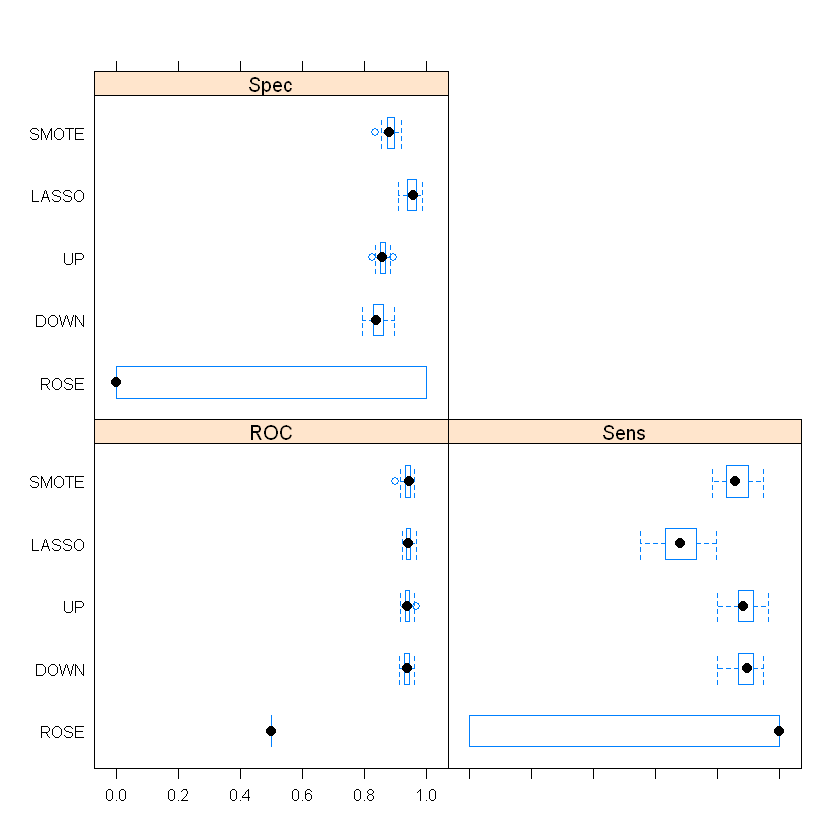

In [25]:
results <- caret::resamples(list(LASSO = lasso.model.caret,
                                 SMOTE = model.smote,
                                 ROSE = model.rose,
                                 UP = model.up,
                                 DOWN = model.down))

# summarise the distributions
summary(results)
bwplot(results)

In [29]:
# importance of variables and definition of lambda (filtering least variables as possible)
imp = varImp(model.up, lambda = model.up$bestTune$lambda*80)$importance 
imp$variable = rownames(imp); imp = imp %>% filter(!Overall == 0) %>% arrange(desc(Overall)) %>% mutate(Overall = round(Overall,2))
names(imp) = c("importance", "variable")
imp

importance,variable
100.00,nome_modelo_woe
93.68,profissao_cli_woe
74.11,nome_mun_loja_woe
53.14,qtd_pg_atr_11_60_woe
46.72,qtd_pg_atr_1_60_woe
13.00,vlr_pg_atr_11_30_woe
9.72,perc_pg_atr_1_60_woe
8.25,qtd_parc_restantes_woe
5.27,qtd_dias_em_atraso_woe
4.38,vlr_pg_atr_11_60_woe


In [40]:
preproc = preProcess(dbs$db_woe_valid, method = "knnImpute", k = 5)
preproc$method$center = NULL
preproc$method$scale = NULL
dbs$db_woe_valid <- predict(preproc, dbs$db_woe_valid)

table(is.na(dbs$db_woe_valid))

pred_results <- predict(model.up, newdata=dbs$db_woe_valid, s =  model.up$bestTune$lambda*80)
prob_results <- predict(model.up, newdata=dbs$db_woe_valid, s =  model.up$bestTune$lambda*80, type = "prob")

dbs$db_woe_valid$target_pred = pred_results
dbs$db_woe_valid$target_prob_bad = prob_results$bad
dbs$db_woe_valid$target_prob_good = prob_results$good

# checking probabilities x target in test database
pred <- prediction(probabilities, dbs$test_db_woe$target)

# creating vectors with 1 to "bad" and 0 to "good" for creating dataframe with perf statistics
observed.classes.num <- ifelse(dbs$db_woe_valid$target == "bad", 1, 0)
predicted.classes.num <- ifelse(dbs$db_woe_valid$target_prob_bad == "bad", 1, 0)

evaluation <- scorecard::perf_eva(label = observed.classes.num, pred = dbs$db_woe_valid$target_prob_bad, show_plot = TRUE)
evaluation$confusion_matrix
df <- melt(data.frame(evaluation$binomial_metric$dat))
names(df) <- c("Statistic", "Value")

Warning message in preProcess.default(dbs$db_woe_valid, method = "knnImpute", k = 5):
"Std. deviations could not be computed for: perc_vnc_renda, perc_pg_atr_360_mais, perc_parc_renda"Warning message in preProcess.default(dbs$db_woe_valid, method = "knnImpute", k = 5):
"These variables have zero variances: qtd_itens, qtd_pg_atr_360_mais, vlr_pg_atr_360_mais, tipo_pessoa_woe, situacao_contrato_woe, vlr_subs_marca_woe, status_contabil_woe, subs_marca_woe, motivo_inad_woe, status_cob_woe"

ERROR: Error: package RANN is required


In [39]:
evaluation

ERROR: Error in eval(expr, envir, enclos): objeto 'evaluation' não encontrado
